<a href="https://colab.research.google.com/github/NakhwaImad/data_analysis/blob/main/Covid_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import urljoin

In [ ]:
#Send an HTTP GET request to fetch COVID-19 data.
responce = requests.get("https://www.worldometers.info/coronavirus/#page-top")
#Store the response from the HTTP request.
responce
#Set the initial URL for COVID-19 data as the starting point
start_url = "https://www.worldometers.info/coronavirus/#page-top"
#Create an empty list to keep track of visited URLs.
visited_urls = []

In [ ]:
#Store the HTML content of the response in 'mydata'.
mydata =responce.text
#Parse the HTML content using BeautifulSoup
beautysoup = BeautifulSoup(mydata)
beautysoup.title.text
#Locate and extract the table rows ('tr') within a specific div class
mytable =beautysoup.find('div',attrs={'class':'main_table_countries_div'}).find("table").findAll('tr')
#Get the text content of the first row in the table.
mytable[0].text

'\n#\nCountry,Other\nTotalCases\nNewCases\nTotalDeaths\nNewDeaths\nTotalRecovered\nNewRecovered\nActiveCases\nSerious,Critical\nTot\xa0Cases/1M pop\nDeaths/1M pop\nTotalTests\nTests/\n1M pop\n\nPopulation\nContinent\n1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl\nNew Cases/1M pop\nNew Deaths/1M pop\nActive Cases/1M pop\n'

# **Web Crawling**
**Interrupt the runtime after 30secs else crawling won't stop**

In [ ]:
# Function to crawl a URL and extract links
def crawl_url(url):
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page
            soup = BeautifulSoup(response.text, "html.parser")

            # Extract data or perform actions as needed
            # In web crawling, you would typically follow links, but for simplicity, let's print the page title
            print("Title:", soup.title.text)

            # Find and follow links on the page
            for link in soup.find_all("a"):
                href = link.get("href")
                if href and href.startswith("http"):
                    absolute_url = href
                else:
                    absolute_url = urljoin(url, href)

                # Ensure that the URL hasn't been visited already
                if absolute_url not in visited_urls:
                    visited_urls.append(absolute_url)
                    crawl_url(absolute_url)
        else:
            print("Failed to retrieve:", url)

    except Exception as e:
        print("Error:", str(e))
# Start crawling from the initial URL
crawl_url(start_url)

Title: COVID - Coronavirus Statistics - Worldometer
Title: Worldometer - real time world statistics
Title: COVID - Coronavirus Statistics - Worldometer
Title: Population - Worldometer
Title: Demographics - Worldometer
Title: World Demographics 2023 (Population, Age, Sex, Trends) - Worldometer
Title: World Demographics 2023 (Population, Age, Sex, Trends) - Worldometer
Title: World Demographics 2023 (Population, Age, Sex, Trends) - Worldometer
Title: World Demographics 2023 (Population, Age, Sex, Trends) - Worldometer
Title: World Demographics 2023 (Population, Age, Sex, Trends) - Worldometer
Title: World Demographics 2023 (Population, Age, Sex, Trends) - Worldometer
Title: World Demographics 2023 (Population, Age, Sex, Trends) - Worldometer
Title: World Demographics 2023 (Population, Age, Sex, Trends) - Worldometer
Title: World Demographics 2023 (Population, Age, Sex, Trends) - Worldometer
Title: World Population Clock: 8.1 Billion People (LIVE, 2023) - Worldometer
Error: HTTPSConnectio

KeyboardInterrupt: ignored

**Web Scraping**

In [ ]:
# Extract table rows from HTML
mytable =beautysoup.find('div',attrs={'class':'main_table_countries_div'}).find("table").findAll('tr')
# Initialize an empty list to store data
datalist = []
# Loop through table rows and format the data
for td in mytable:
          x = td.text.replace("\n",",")
          datalist.append(x)
# Extract column names
columns = "".join(datalist[0])
columns = list(columns.split(","))

columns
# Create an empty dictionary to store data
dic = {}
# Initialize dictionary values
for n in columns :

  dic[n] =[""]

# Create a DataFrame from the dictionary
datasit = pd.DataFrame(dic)

# Rename specific columns
datasit.rename(columns = {'Tests/': 'Tests/1M pop', 'Serious': 'Serious Critical',"Country":"Country, Other"}, inplace = True)
# Drop unnecessary columns
datasit = datasit.drop(columns = ["","Other","Continent"    ,"1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl",    "New Cases/1M pop"  ,"New Deaths/1M pop",   "Active Cases/1M pop","1M pop","Critical"])
# Get the shape of the DataFrame
datasit.shape

(1, 15)

In [ ]:
datasit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 1 non-null      object
 1   Country, Other    1 non-null      object
 2   TotalCases        1 non-null      object
 3   NewCases          1 non-null      object
 4   TotalDeaths       1 non-null      object
 5   NewDeaths         1 non-null      object
 6   TotalRecovered    1 non-null      object
 7   NewRecovered      1 non-null      object
 8   ActiveCases       1 non-null      object
 9   Serious Critical  1 non-null      object
 10  Tot Cases/1M pop  1 non-null      object
 11  Deaths/1M pop     1 non-null      object
 12  TotalTests        1 non-null      object
 13  Tests/1M pop      1 non-null      object
 14  Population        1 non-null      object
dtypes: object(15)
memory usage: 248.0+ bytes


In [ ]:
# Extract table rows from HTML
mytable =beautysoup.find('div',attrs={'class':'main_table_countries_div'}).find("table").findAll('tr')
# Initialize an empty list to store data
datalist = []
# Iterate through table rows starting from the 10th row (index 9)
for td in range(9,len(mytable)):
          # Replace newline characters with "bic" for data formatting
          x = mytable[td].text.replace("\n","bic")
          datalist.append(x)
          # Join the formatted data for the corresponding row (index td-9)
          rs = "".join(datalist[td-9])
          datalist[td-9] = list(rs.split("bic"))

# Delete the last row (index -1) 8 times
for rv in range(1,9) :
  del datalist[-1]
# Extract column names from the DataFrame
datasit.columns

Index(['#', 'Country, Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'Population'],
      dtype='object')

In [ ]:
# Loop through the data list
for x in range(0,len(datalist)):
  # Extract a single row of data
  addraw = datalist[x]
  # Slice the row to select the first 15 elements
  newaddraw = addraw[1:16]
  # Create a dictionary with column names as keys and corresponding data as values
  toadd = {'#': newaddraw[0],
         'Country, Other': newaddraw[1],
         'TotalCases': newaddraw[2],
         'NewCases':newaddraw[3],
         'TotalDeaths': newaddraw[4],
         'NewDeaths': newaddraw[5],
         'TotalRecovered': newaddraw[6],
         'NewRecovered': newaddraw[7],
         'ActiveCases': newaddraw[8],
          'Serious Critical':newaddraw[9],
        'Tot Cases/1M pop':newaddraw[10],
        'Deaths/1M pop': newaddraw[11],
        'TotalTests': newaddraw[12],
        'Tests/1M pop':newaddraw[13],
        'Population': newaddraw[14]}
  # Append the dictionary as a new row to the DataFrame
  datasit = datasit.append(toadd, ignore_index=True)
# Display the first few rows of the DataFrame
datasit.head()

<ipython-input-9-c8298543ff12>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasit = datasit.append(toadd, ignore_index=True)
<ipython-input-9-c8298543ff12>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasit = datasit.append(toadd, ignore_index=True)
<ipython-input-9-c8298543ff12>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasit = datasit.append(toadd, ignore_index=True)
<ipython-input-9-c8298543ff12>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasit = datasit.append(toadd, ignore_index=True)
<ipython-input-9-c8298543ff12>:24: FutureWarning: The frame.append method is deprecated and will be removed from pan

,#,"Country, Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Tot Cases/1M pop
0,,,,,,,,,,,,,,,,NaN
1,1,USA,"108,871,849",,"1,178,490",,"106,706,793",,"986,566","1,578",NaN,"3,520","1,186,346,810","3,543,393","334,805,269","325,180"
2,2,India,"44,999,392",,"531,930",,"44,467,020",,442,N/A,NaN,378,"930,797,975","661,721","1,406,631,776","31,991"
3,3,France,"40,138,560",,"167,642",,"39,970,918",,0,869,NaN,"2,556","271,490,188","4,139,547","65,584,518","612,013"
4,4,Germany,"38,507,549",,"176,228",,"38,240,600",,"90,721",N/A,NaN,"2,101","122,332,384","1,458,359","83,883,596","459,059"


In [ ]:
 # Import the pandas library as pd
 import pandas as pd
 # Save the DataFrame datasit to a CSV file named 'df.csv'
 datasit.to_csv("df.csv")

In [ ]:
# Read the CSV file 'df.csv' into a new DataFrame named 'df'
df = pd.read_csv('df.csv')



# **Data Cleaning**

In [ ]:
# Rename the column 'Tot Cases/1M pop' to 'Tot Cases/1M pop_2' in the DataFrame 'df'
df.rename(columns={'Tot Cases/1M pop': 'Tot Cases/1M pop_2'}, inplace=True)

In [ ]:
# Display the column names of the DataFrame 'df'
df.columns

Index(['Unnamed: 0', '#', 'Country, Other', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'Population', 'Tot Cases/1M pop_2'],
      dtype='object')

In [ ]:
# Drop the column at index 11
df.drop(df.columns[11], axis=1, inplace=True)

In [ ]:
# Display the first few rows of the DataFrame 'df'
df.head()

,Unnamed: 0,#,"Country, Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious Critical,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Tot Cases/1M pop_2
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,USA,"108,825,982",NaN,"1,178,152",NaN,"106,636,148",NaN,"1,011,682","1,548","3,519","1,186,346,810","3,543,393","334,805,269","325,043"
2,2,2.0,India,"44,999,243",NaN,"531,930",NaN,"44,466,846",NaN,467,NaN,378,"930,797,975","661,721","1,406,631,776","31,991"
3,3,3.0,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,869,"2,556","271,490,188","4,139,547","65,584,518","612,013"
4,4,4.0,Germany,"38,502,170",NaN,"176,175",NaN,"38,240,600",NaN,"85,395",NaN,"2,100","122,332,384","1,458,359","83,883,596","458,995"


In [ ]:
# Display the column names of the DataFrame 'df'
df.columns

Index(['Unnamed: 0', '#', 'Country, Other', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious Critical', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop', 'Population', 'Tot Cases/1M pop_2'],
      dtype='object')

In [ ]:
# Check for missing values in the DataFrame 'df' and display the count of missing values per column
df.isnull().sum()

Unnamed: 0              0
#                       1
Country, Other          1
TotalCases              1
NewCases              231
TotalDeaths             1
NewDeaths             232
TotalRecovered         23
NewRecovered          227
ActiveCases            21
Serious Critical      115
Deaths/1M pop           8
TotalTests             19
Tests/1M pop           19
Population              1
Tot Cases/1M pop_2      3
dtype: int64

In [ ]:
# Display the first five rows of the DataFrame
df.head()

,Unnamed: 0,#,"Country, Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious Critical,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Tot Cases/1M pop_2
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,USA,"108,825,982",NaN,"1,178,152",NaN,"106,636,148",NaN,"1,011,682","1,548","3,519","1,186,346,810","3,543,393","334,805,269","325,043"
2,2,2.0,India,"44,999,243",NaN,"531,930",NaN,"44,466,846",NaN,467,NaN,378,"930,797,975","661,721","1,406,631,776","31,991"
3,3,3.0,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,869,"2,556","271,490,188","4,139,547","65,584,518","612,013"
4,4,4.0,Germany,"38,502,170",NaN,"176,175",NaN,"38,240,600",NaN,"85,395",NaN,"2,100","122,332,384","1,458,359","83,883,596","458,995"


In [ ]:
# Check for duplicated rows in the DataFrame 'df'
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
227    False
228    False
229    False
230    False
231    False
Length: 232, dtype: bool

In [ ]:
# Display summary statistics for the 'TotalCases' column in the DataFrame 'df'
df['TotalCases'].describe()

count             231
unique            231
top       108,825,982
freq                1
Name: TotalCases, dtype: object

In [ ]:
# Drop columns 'NewCases', 'NewDeaths', 'NewRecovered' from the DataFrame 'df'
df.drop(columns=['NewCases','NewDeaths','NewRecovered'], axis=1, inplace=True)

In [ ]:
# Drop the column 'Unnamed: 0' from the DataFrame 'df'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,#,"Country, Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Serious Critical,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Tot Cases/1M pop_2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,USA,"108,825,982","1,178,152","106,636,148","1,011,682","1,548","3,519","1,186,346,810","3,543,393","334,805,269","325,043"
2,2.0,India,"44,999,243","531,930","44,466,846",467,NaN,378,"930,797,975","661,721","1,406,631,776","31,991"
3,3.0,France,"40,138,560","167,642","39,970,918",0,869,"2,556","271,490,188","4,139,547","65,584,518","612,013"
4,4.0,Germany,"38,502,170","176,175","38,240,600","85,395",NaN,"2,100","122,332,384","1,458,359","83,883,596","458,995"


In [ ]:
# Move the 'Country' column to the first position in the DataFrame 'df'
df.insert(0, 'Country', df.pop('Country, Other'))

In [ ]:
df.head()

,Country,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Serious Critical,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Tot Cases/1M pop_2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,1.0,"108,825,982","1,178,152","106,636,148","1,011,682","1,548","3,519","1,186,346,810","3,543,393","334,805,269","325,043"
2,India,2.0,"44,999,243","531,930","44,466,846",467,NaN,378,"930,797,975","661,721","1,406,631,776","31,991"
3,France,3.0,"40,138,560","167,642","39,970,918",0,869,"2,556","271,490,188","4,139,547","65,584,518","612,013"
4,Germany,4.0,"38,502,170","176,175","38,240,600","85,395",NaN,"2,100","122,332,384","1,458,359","83,883,596","458,995"


In [ ]:
# Check for missing values in the DataFrame 'df' and display the count of missing values per column
df.isnull().sum()

Country                 1
#                       1
TotalCases              1
TotalDeaths             1
TotalRecovered         23
ActiveCases            21
Serious Critical      115
Deaths/1M pop           8
TotalTests             19
Tests/1M pop           19
Population              1
Tot Cases/1M pop_2      3
dtype: int64

In [ ]:
# Remove commas and convert the 'Serious Critical' column to a float data type
df["Serious Critical"] = df["Serious Critical"].str.replace(',', '').astype(float)



In [ ]:
# Calculate the mean of the 'Serious Critical' column
mean_value = df["Serious Critical"].mean()
# Fill missing values in the 'Serious Critical' column with the calculated mean
df["Serious Critical"].fillna(mean_value, inplace=True)

In [ ]:

df

,Country,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Serious Critical,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Tot Cases/1M pop_2
0,NaN,NaN,NaN,NaN,NaN,NaN,63.017094,NaN,NaN,NaN,NaN,NaN
1,USA,1.0,"108,825,982","1,178,152","106,636,148","1,011,682",1548.000000,"3,519","1,186,346,810","3,543,393","334,805,269","325,043"
2,India,2.0,"44,999,243","531,930","44,466,846",467,63.017094,378,"930,797,975","661,721","1,406,631,776","31,991"
3,France,3.0,"40,138,560","167,642","39,970,918",0,869.000000,"2,556","271,490,188","4,139,547","65,584,518","612,013"
4,Germany,4.0,"38,502,170","176,175","38,240,600","85,395",63.017094,"2,100","122,332,384","1,458,359","83,883,596","458,995"
...,...,...,...,...,...,...,...,...,...,...,...,...
227,Tokelau,227.0,80,,NaN,80,63.017094,NaN,NaN,NaN,"1,378","58,055"
228,Vatican City,228.0,29,,29,0,63.017094,NaN,NaN,NaN,799,"36,295"
229,Western Sahara,229.0,10,1,9,0,63.017094,2,NaN,NaN,"626,161",16
230,MS Zaandam,230.0,9,2,7,0,63.017094,NaN,NaN,NaN,,NaN


In [ ]:
# Display the data types
df.dtypes

Country                object
#                     float64
TotalCases             object
TotalDeaths            object
TotalRecovered         object
ActiveCases            object
Serious Critical      float64
Deaths/1M pop          object
TotalTests             object
Tests/1M pop           object
Population             object
Tot Cases/1M pop_2     object
dtype: object

In [ ]:
# Convert the 'Serious Critical' column to integer data type
df['Serious Critical'] = df['Serious Critical'].astype(int)

In [ ]:
# Drop rows with any remaining missing values in the DataFrame 'df'
df.dropna(inplace=True)

In [ ]:
# Check for missing values in the DataFrame 'df' after the operations
df.isnull().sum()

Country               0
#                     0
TotalCases            0
TotalDeaths           0
TotalRecovered        0
ActiveCases           0
Serious Critical      0
Deaths/1M pop         0
TotalTests            0
Tests/1M pop          0
Population            0
Tot Cases/1M pop_2    0
dtype: int64

In [ ]:
# Display the DataFrame 'df' after handling missing values and data type conversion
df

,Country,#,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Serious Critical,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Tot Cases/1M pop_2
1,USA,1.0,"108,825,982","1,178,152","106,636,148","1,011,682",1548,"3,519","1,186,346,810","3,543,393","334,805,269","325,043"
2,India,2.0,"44,999,243","531,930","44,466,846",467,63,378,"930,797,975","661,721","1,406,631,776","31,991"
3,France,3.0,"40,138,560","167,642","39,970,918",0,869,"2,556","271,490,188","4,139,547","65,584,518","612,013"
4,Germany,4.0,"38,502,170","176,175","38,240,600","85,395",63,"2,100","122,332,384","1,458,359","83,883,596","458,995"
5,Brazil,5.0,"37,827,912","705,962","36,249,161","872,789",63,"3,278","63,776,166","296,146","215,353,593","175,655"
...,...,...,...,...,...,...,...,...,...,...,...,...
218,Anguilla,218.0,"3,904",12,"3,879",13,4,788,"51,382","3,373,736","15,230","256,336"
219,Wallis and Futuna,219.0,"3,550",8,438,"3,104",63,728,"20,508","1,867,419","10,982","323,256"
220,Saint Pierre Miquelon,220.0,"3,452",2,"2,449","1,001",1,347,"25,400","4,410,488","5,759","599,410"
224,Montserrat,224.0,"1,403",8,"1,376",19,63,"1,611","17,762","3,577,442","4,965","282,578"


In [ ]:
# Display the data types of columns in the DataFrame 'df'
df.dtypes

Country                object
#                     float64
TotalCases             object
TotalDeaths            object
TotalRecovered         object
ActiveCases            object
Serious Critical        int64
Deaths/1M pop          object
TotalTests             object
Tests/1M pop           object
Population             object
Tot Cases/1M pop_2     object
dtype: object

In [ ]:
#identifying colums with commas

comma_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].str.contains(',').any():
            comma_cols.append(col)


In [ ]:
#removing the commas

for col in comma_cols:
    df[col] = df[col].str.replace(',', '')


In [ ]:
# Convert these columns to integer data type
df['TotalCases'] = df['TotalCases'].astype(int)
df['ActiveCases'] = df['ActiveCases'].astype(int)
df['TotalRecovered'] = df['TotalRecovered'].astype(int)
df['TotalTests'] = df['TotalTests'].astype(int)
df['Population'] = df['Population'].astype(int)

In [ ]:
# Display the data types of columns in the DataFrame 'df' after the data type conversions
df.dtypes

Country                object
#                     float64
TotalCases              int64
TotalDeaths            object
TotalRecovered          int64
ActiveCases             int64
Serious Critical        int64
Deaths/1M pop          object
TotalTests              int64
Tests/1M pop           object
Population              int64
Tot Cases/1M pop_2     object
dtype: object

**Data** **Visualisation**

**1) Show the comparison of total case and total deaths by country?**

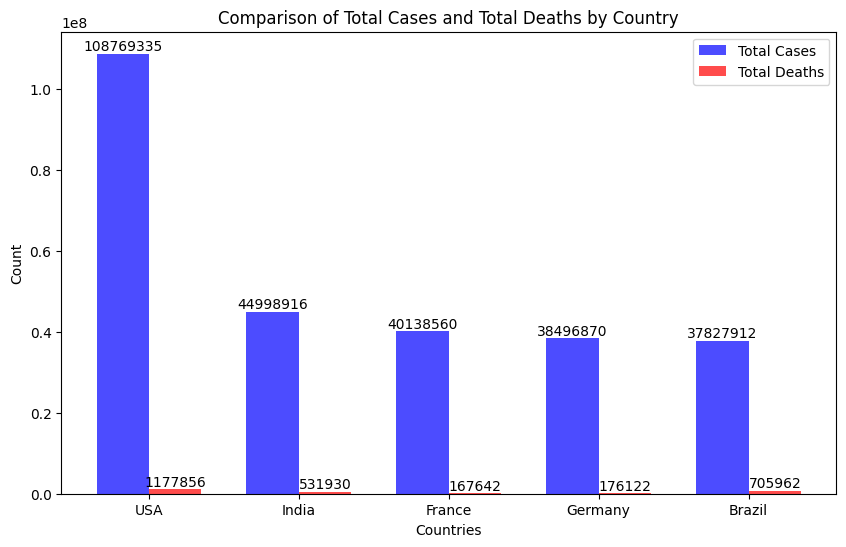

In [ ]:
import matplotlib.pyplot as plt
countries = ["USA", "India", "France", "Germany", "Brazil"]
total_cases = [108769335, 44998916, 40138560, 38496870, 37827912]
total_deaths = [1177856, 531930, 167642, 176122, 705962]
# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(countries))
bar1 = plt.bar(index, total_cases, bar_width, label='Total Cases', color='b', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], total_deaths, bar_width, label='Total Deaths', color='r', alpha=0.7)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Comparison of Total Cases and Total Deaths by Country')
plt.xticks([i + bar_width / 2 for i in index], countries)
plt.legend()
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)
# Show the plot or save it as an image
plt.show()

**2) Show a scatter plot comparing the total dealth and total revories by the country?**

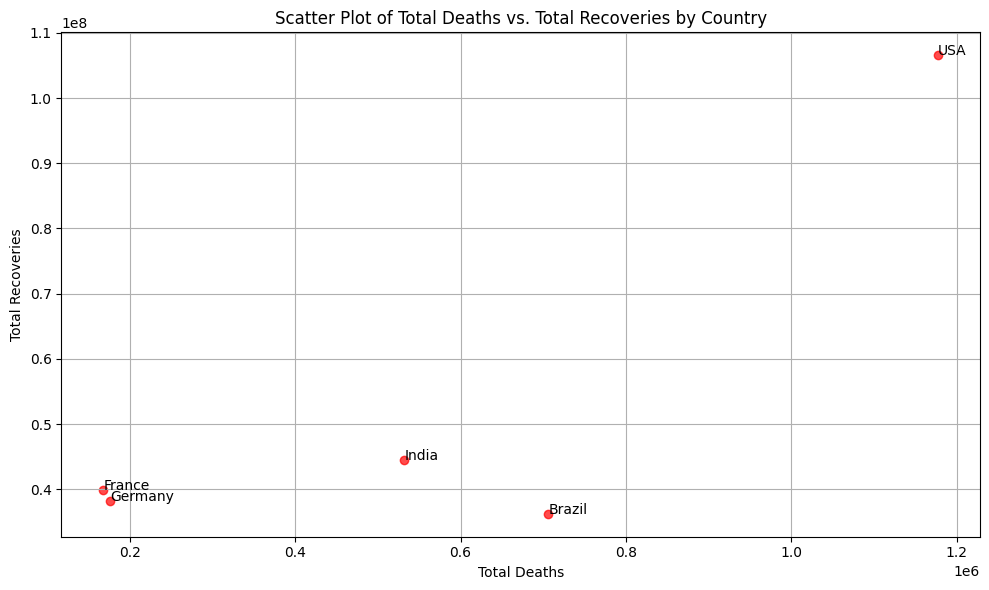

In [ ]:
total_deaths = [1177856, 531930, 167642, 176122, 705962]
total_recoveries = [106561862, 44466458, 39970918, 38240600, 36249161]
countries = ["USA", "India", "France", "Germany", "Brazil"]
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(total_deaths, total_recoveries, color='red', marker='o', alpha=0.7)
plt.title('Scatter Plot of Total Deaths vs. Total Recoveries by Country')
plt.xlabel('Total Deaths')
plt.ylabel('Total Recoveries')
# Add data labels (country names) to the points
for i, country in enumerate(countries):
    plt.annotate(country, (total_deaths[i], total_recoveries[i]), fontsize=10, ha='left')
# Show the scatter plot
plt.grid(True)
plt.tight_layout()
plt.show()

**3) What is the distribution of active case and serious critical case by country?**

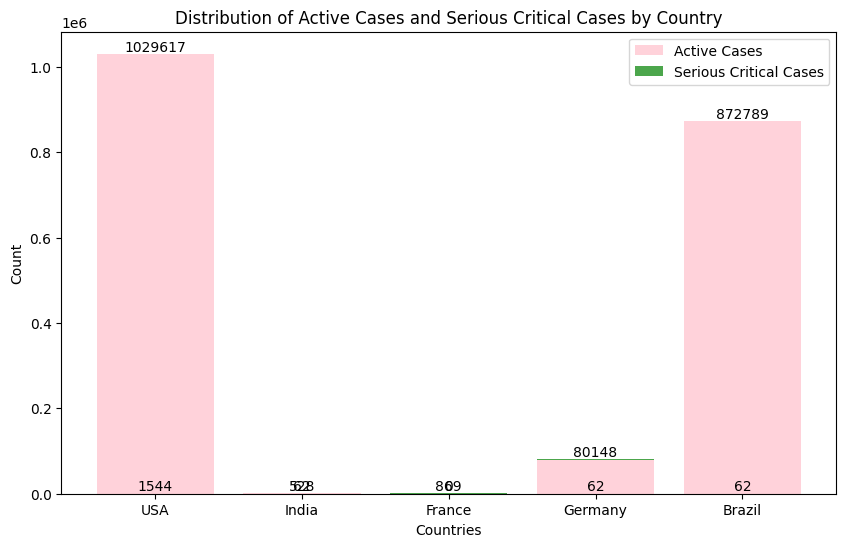

In [ ]:
countries = ["USA", "India", "France", "Germany", "Brazil"]
active_cases = [1029617, 528, 0, 80148, 872789]
serious_critical_cases = [1544, 62, 869, 62, 62]
# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(countries))
bar1 = plt.bar(index, active_cases, label='Active Cases', color='pink', alpha=0.7)
bar2 = plt.bar(index, serious_critical_cases, label='Serious Critical Cases', color='green', alpha=0.7, bottom=active_cases)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Distribution of Active Cases and Serious Critical Cases by Country')
plt.xticks(index, countries)
plt.legend()
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)
plt.show()


**4) What is the distribution of active COVID-19 cases, recovered cases, and deaths in USA?**

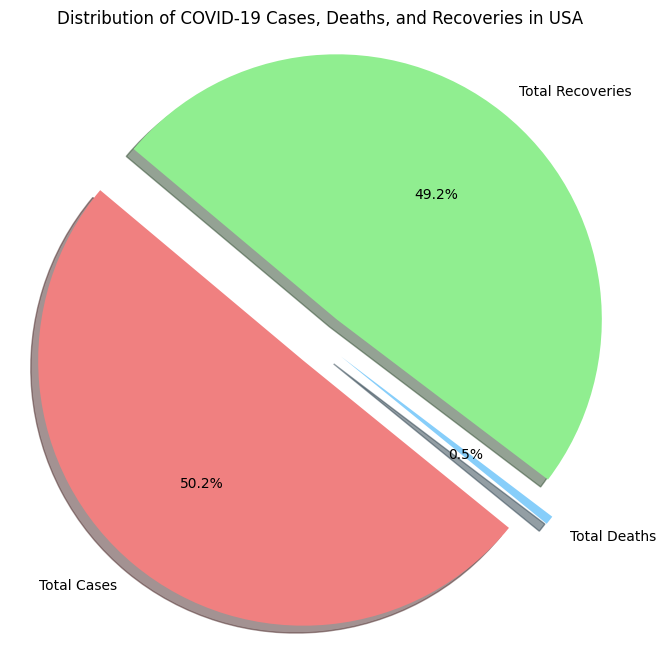

In [ ]:
country = "USA"
total_cases = 108752796
total_deaths = 1177283
total_recoveries = 106528949
# Create data for the pie chart
labels = ['Total Cases', 'Total Deaths', 'Total Recoveries']
sizes = [total_cases, total_deaths, total_recoveries]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0.1, 0.1)  # Explode the slices for emphasis
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(f'Distribution of COVID-19 Cases, Deaths, and Recoveries in {country}')
# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**5) What are the total number of COVID-19 cases per 1 million population?**

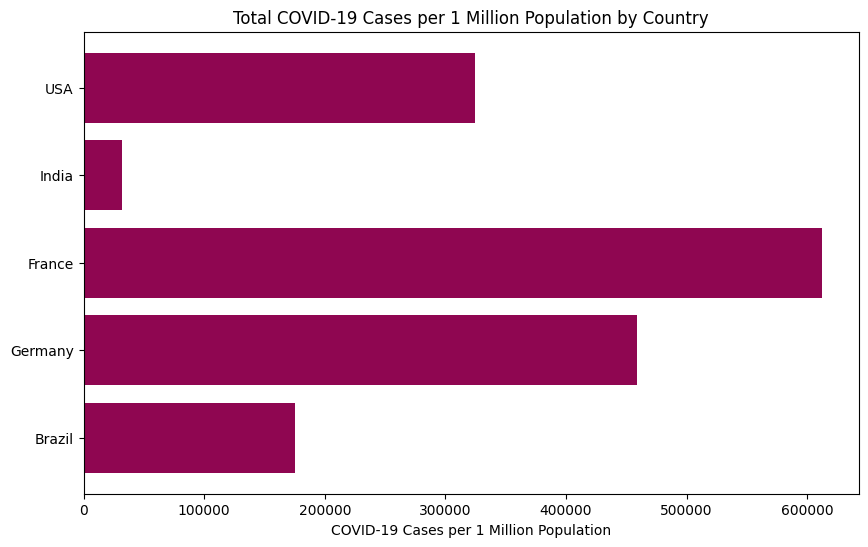

In [ ]:
countries = ["USA", "India", "France", "Germany", "Brazil"]
cases_per_million = [324824, 31990, 612013, 458888, 175511]  # Cases per 1 million population
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(countries, cases_per_million, color='#8F0651')
plt.xlabel('COVID-19 Cases per 1 Million Population')
plt.title('Total COVID-19 Cases per 1 Million Population by Country')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest value at the top
# Display the chart
plt.show()


**6) Show the comparison of total case and active cases by country?**

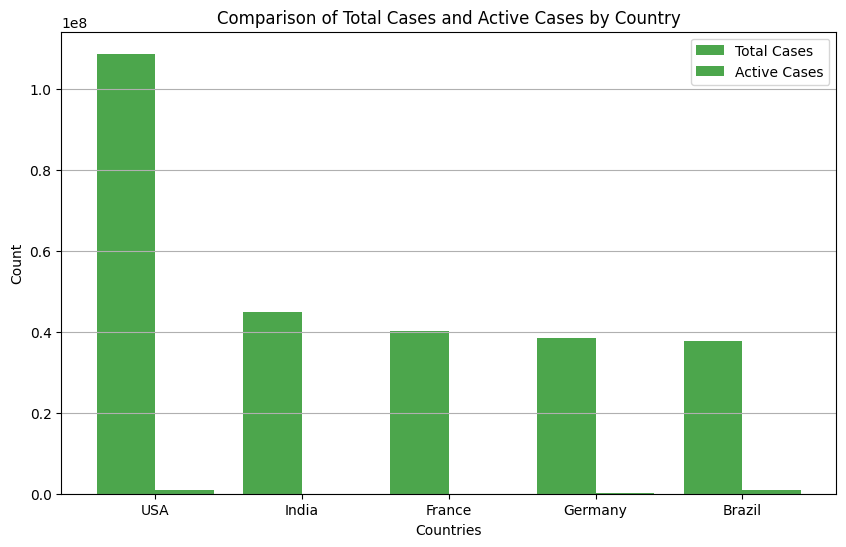

In [ ]:
import numpy as np
total_cases = [108769335, 44998916, 40138560, 38496870, 37827912]
active_cases = [1029617, 528, 0, 80148, 872789]
countries = ["USA", "India", "France", "Germany", "Brazil"]
# Create an array of indices for the countries
indices = np.arange(len(countries))
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
width = 0.4  # Width of each bar
plt.bar(indices, total_cases, width, label='Total Cases', color='green', alpha=0.7)
plt.bar(indices + width, active_cases, width, label='Active Cases', color='g', alpha=0.7)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Comparison of Total Cases and Active Cases by Country')
plt.xticks(indices + width / 2, countries)
plt.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
df.dtypes

Country                object
#                     float64
TotalCases              int64
TotalDeaths            object
TotalRecovered          int64
ActiveCases             int64
Serious Critical        int64
Deaths/1M pop          object
TotalTests              int64
Tests/1M pop           object
Population              int64
Tot Cases/1M pop_2     object
dtype: object

# **7) Which are the top 10 countries with the highest number of serious critical cases?**

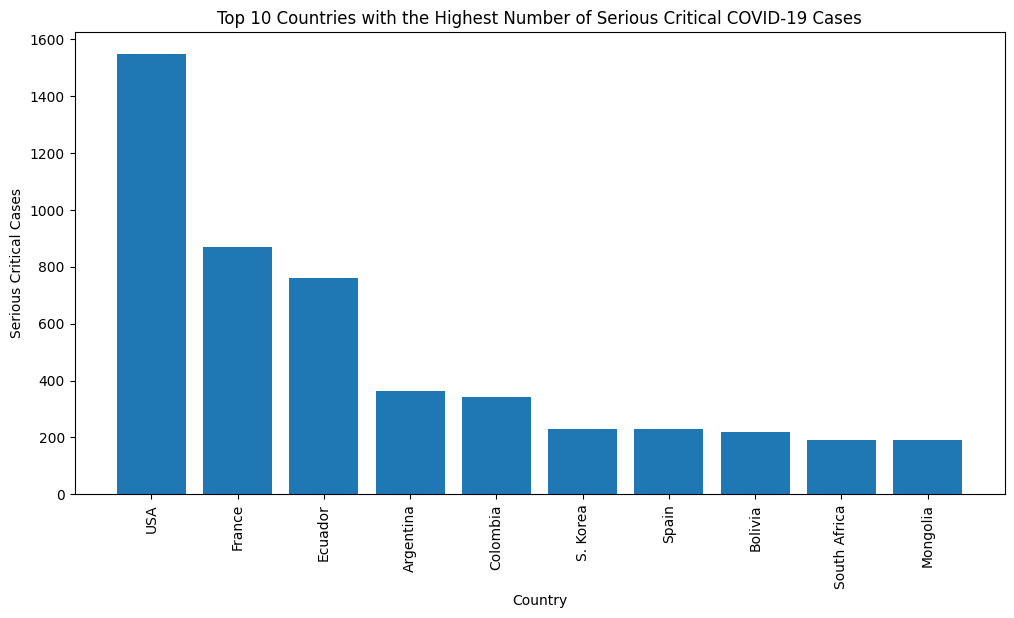

In [ ]:
top_10_serious_critical = df.nlargest(10, 'Serious Critical')

plt.figure(figsize=(12, 6))
plt.bar(top_10_serious_critical['Country'], top_10_serious_critical['Serious Critical'])
plt.xlabel('Country')
plt.ylabel('Serious Critical Cases')
plt.title('Top 10 Countries with the Highest Number of Serious Critical COVID-19 Cases')
plt.xticks(rotation=90)
plt.show()






# **Q8)Which countries have the highest total COVID-19 deaths among the top 10?**

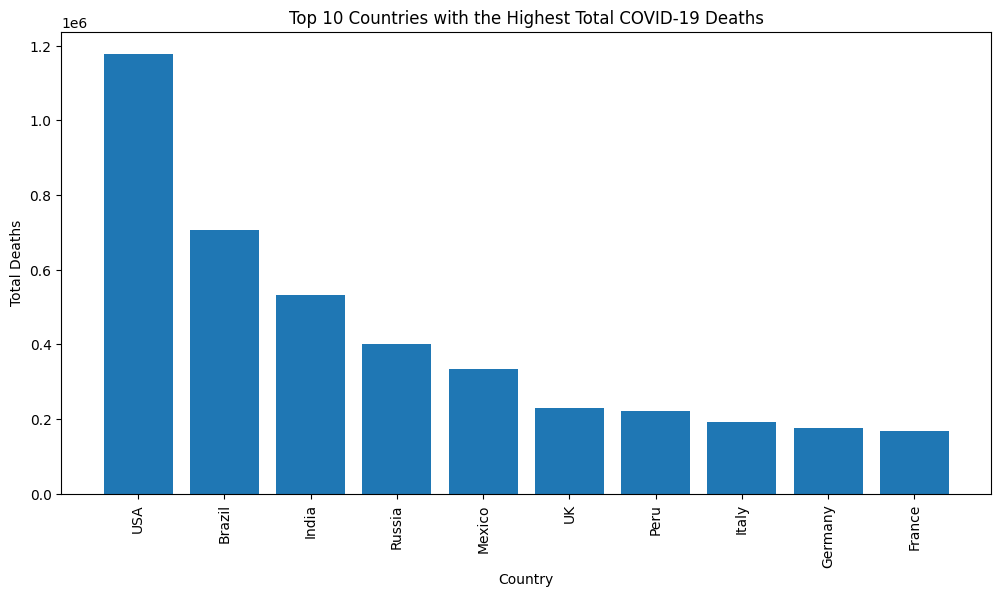

In [ ]:
df['TotalDeaths'] = df['TotalDeaths'].astype(int)

top_10_deaths = df.nlargest(10, 'TotalDeaths')

plt.figure(figsize=(12, 6))
plt.bar(top_10_deaths['Country'], top_10_deaths['TotalDeaths'].astype(float))
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 10 Countries with the Highest Total COVID-19 Deaths')
plt.xticks(rotation=90)
plt.show()
